In [40]:
import pandas as pd
df = pd.read_csv('ccdefault.csv')
df = df[df.columns[1:]]

In [41]:
#import sklearn
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:23].values
y=df[df.columns[23]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
#
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [10,20,50,100,125,150,200,300]}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 1, return_train_score=True)

In [11]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n

In [12]:
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n

In [13]:
mean_train_score =grid_search.cv_results_['mean_train_score']
print(mean_train_score)


[0.9793786  0.99305761 0.998893   0.9993786  0.99938683 0.99938683
 0.99938683 0.99938683]


In [14]:
mean_test_score =grid_search.cv_results_['mean_test_score']
print(mean_test_score)



[0.80507407 0.81077778 0.815      0.81540741 0.81544444 0.8157037
 0.81551852 0.81525926]


In [15]:
grid_search.best_params_

{'n_estimators': 150}

In [19]:
#build the randomforestclassifier model with the best parameters
rfc = RandomForestClassifier(n_estimators=150,random_state=42)
#fit the model with training set
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
# Get feature importances from our random forest model

importances = rfc.feature_importances_

In [43]:
importances

array([0.05937166, 0.01225486, 0.02092848, 0.01402413, 0.06666543,
       0.0966216 , 0.04175797, 0.02572934, 0.02489823, 0.02030771,
       0.02084585, 0.0600443 , 0.0548996 , 0.0516132 , 0.05021729,
       0.04993713, 0.05117303, 0.0507217 , 0.04832639, 0.04582509,
       0.04362375, 0.04364598, 0.04656731])

In [44]:
# Get the index of importances from greatest importance to least
import numpy as np
sorted_index = np.argsort(importances)[::-1]

x = range(len(importances))


In [45]:
sorted_index

array([ 5,  4, 11,  0, 12, 13, 16, 17, 14, 15, 18, 22, 19, 21, 20,  6,  7,
        8,  2, 10,  9,  3,  1])

In [48]:
dX = df.iloc[:, 0:23]
df.feature_names = list(dX.columns.values) 
df.class_names = df.columns[23]

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [53]:
labels =np.array(df.feature_names)[sorted_index]

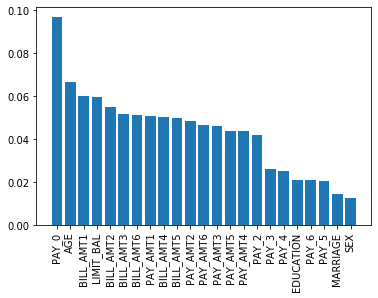

In [57]:
import matplotlib.pyplot as plt
plt.bar(x, importances[sorted_index], tick_label=labels)
# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [58]:
print("My name is Xuehui Chao")
print("My NetID is: xuehuic2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xuehui Chao
My NetID is: xuehuic2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
